<a href="https://colab.research.google.com/github/TabasomJebreili/film-financials-linear-regression/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project explores the relationship between movie production budgets and worldwide box office revenue. Using data scraped from The Numbers
 on May 1, 2018, we analyze 5,000+ films released from 1915 to 2018 to see whether bigger budgets lead to bigger profits


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

In [ ]:
data.shape

(5391, 6)

In [ ]:
data.isna().values.any()

np.False_

In [ ]:
data.duplicated().any()

np.False_

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
data.describe()

,Rank
count,"5,391.00"
mean,"2,696.00"
std,"1,556.39"
min,1.00
25%,"1,348.50"
50%,"2,696.00"
75%,"4,043.50"
max,"5,391.00"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

In [ ]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$', '').str.replace(',','')
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

In [ ]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$', '').str.replace(',','')
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

In [ ]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$', '').str.replace(',','')
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [ ]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3337,3826,2009-02-13,Gomorra,6200000,37339594,1579146
830,393,1995-12-22,Cutthroat Island,92000000,18517322,10017322
1112,4910,1998-07-08,Safe Men,1000000,21210,21210
4878,1115,2015-04-17,Child 44,50000000,3434330,1224330
1334,3058,1999-10-29,Being John Malkovich,13000000,32382381,22858926


### Descriptive Statistics

We’ll use summary statistics to answer questions like:

What’s the average production budget and global revenue?
What are the minimum revenues for domestic and worldwide sales?
Are the bottom 25% of films profitable or not?
Which films had the highest budget and highest revenue?
How much revenue did the cheapest and most expensive films generate

In [ ]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [ ]:
data.USD_Production_Budget.idxmax()

3529

In [ ]:
data.loc[3529]

,3529
Rank,1
Release_Date,2009-12-18 00:00:00
Movie_Title,Avatar
USD_Production_Budget,425000000
USD_Worldwide_Gross,2783918982
USD_Domestic_Gross,760507625


In [ ]:
data.USD_Production_Budget.idxmin()

2427

In [ ]:
data.loc[2427]

,2427
Rank,5391
Release_Date,2005-05-08 00:00:00
Movie_Title,My Date With Drew
USD_Production_Budget,1100
USD_Worldwide_Gross,181041
USD_Domestic_Gross,181041


# Investigating the Zero Revenue Films

In [ ]:
zero_revenue_films = data[data.USD_Domestic_Gross == 0]

In [ ]:
zero_revenue_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
zero_revenue_films_w = data[data.USD_Worldwide_Gross == 0]
zero_revenue_films_w.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [ ]:
international_releases = data.loc[(data.USD_Domestic_Gross==0)&(data.USD_Worldwide_Gross!=0)]

In [ ]:
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


Filtering the dataset to find movies that earned money globally but made zero revenue in the U.S.

In [ ]:
new_international_releases = data.query("USD_Domestic_Gross == 0 & USD_Worldwide_Gross != 0")

In [ ]:
new_international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [ ]:
not_released = data.query("Release_Date > @scrape_date")

In [ ]:
data_clean = data.drop(not_released.index)

In [ ]:
data_clean.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
350,2790,1982-12-17,Tootsie,15000000,177200000,177200000


### Films that Lost Money

In [ ]:
lose_rows = data[data.USD_Production_Budget > data.USD_Worldwide_Gross]

In [ ]:
len(lose_rows)/len(data_clean)*100

37.40713224368499

# Seaborn Bubble Charts

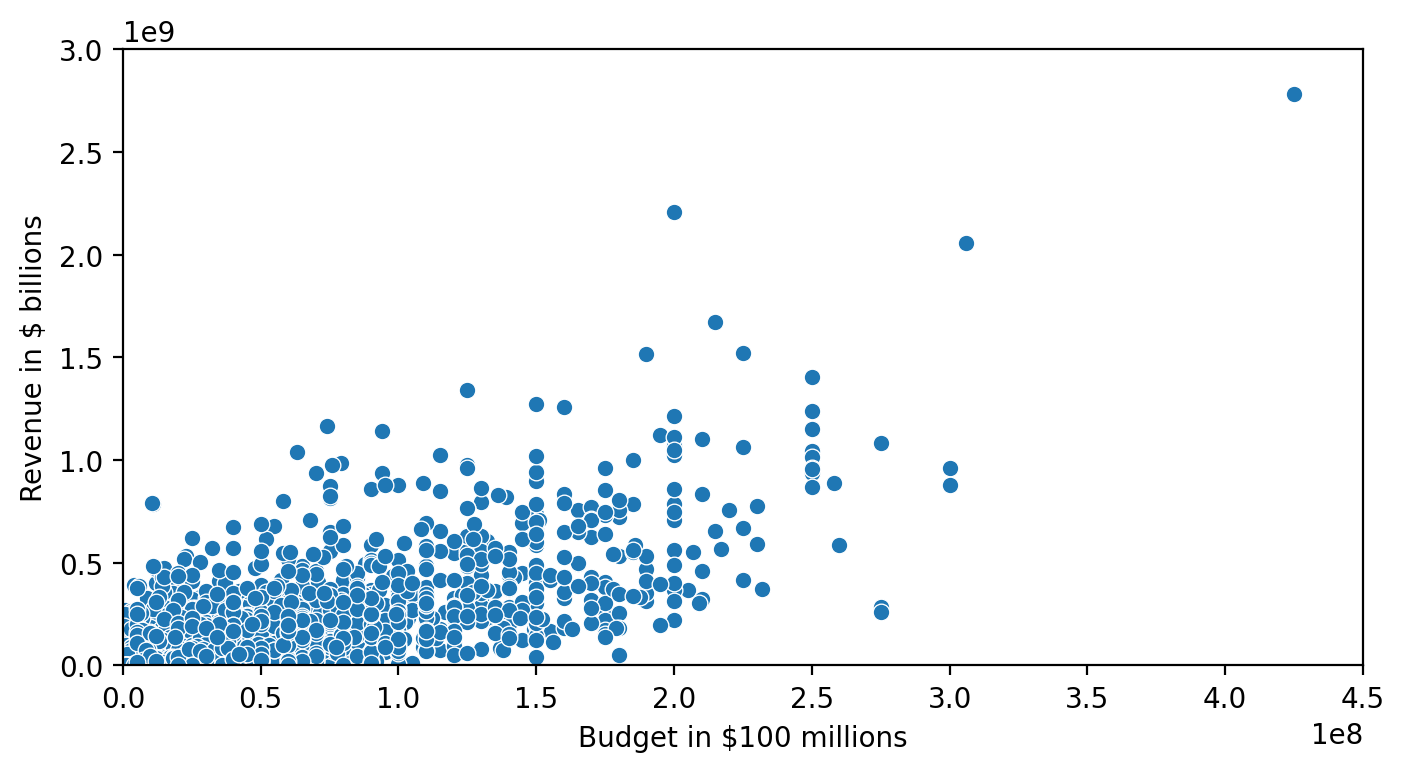

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')
ax.set(ylim=(0,3000000000), xlim=(0, 450000000), xlabel='Budget in $100 millions',ylabel='Revenue in $ billions')
plt.show()

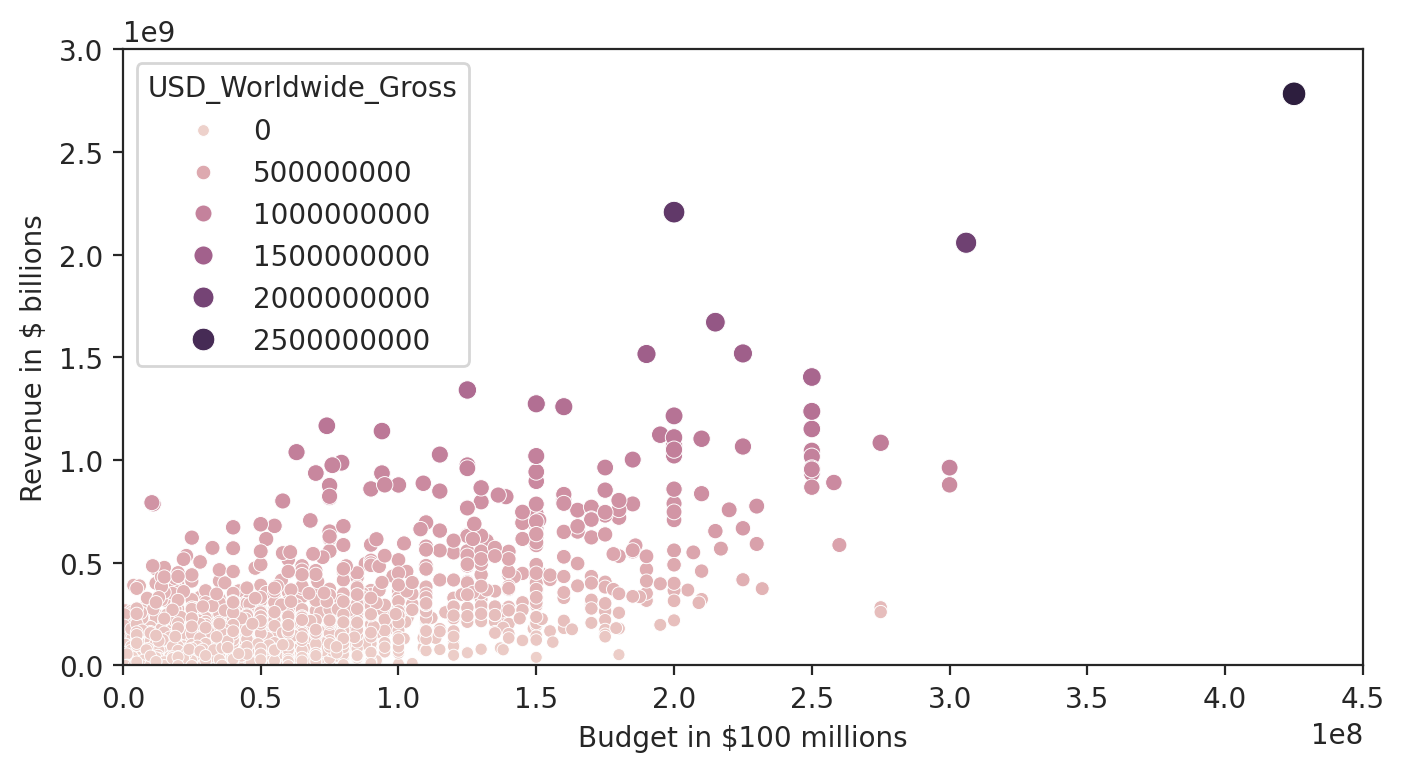

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('ticks'):
  ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')
  ax.set(ylim=(0,3000000000), xlim=(0, 450000000), xlabel='Budget in $100 millions',ylabel='Revenue in $ billions')
  plt.show()

In [ ]:
year = data_clean.Release_Date.dt.year

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Budget in $100 millions'),
 (np.float64(-19876.0), np.float64(17531.0)),
 (0.0, 450000000.0)]

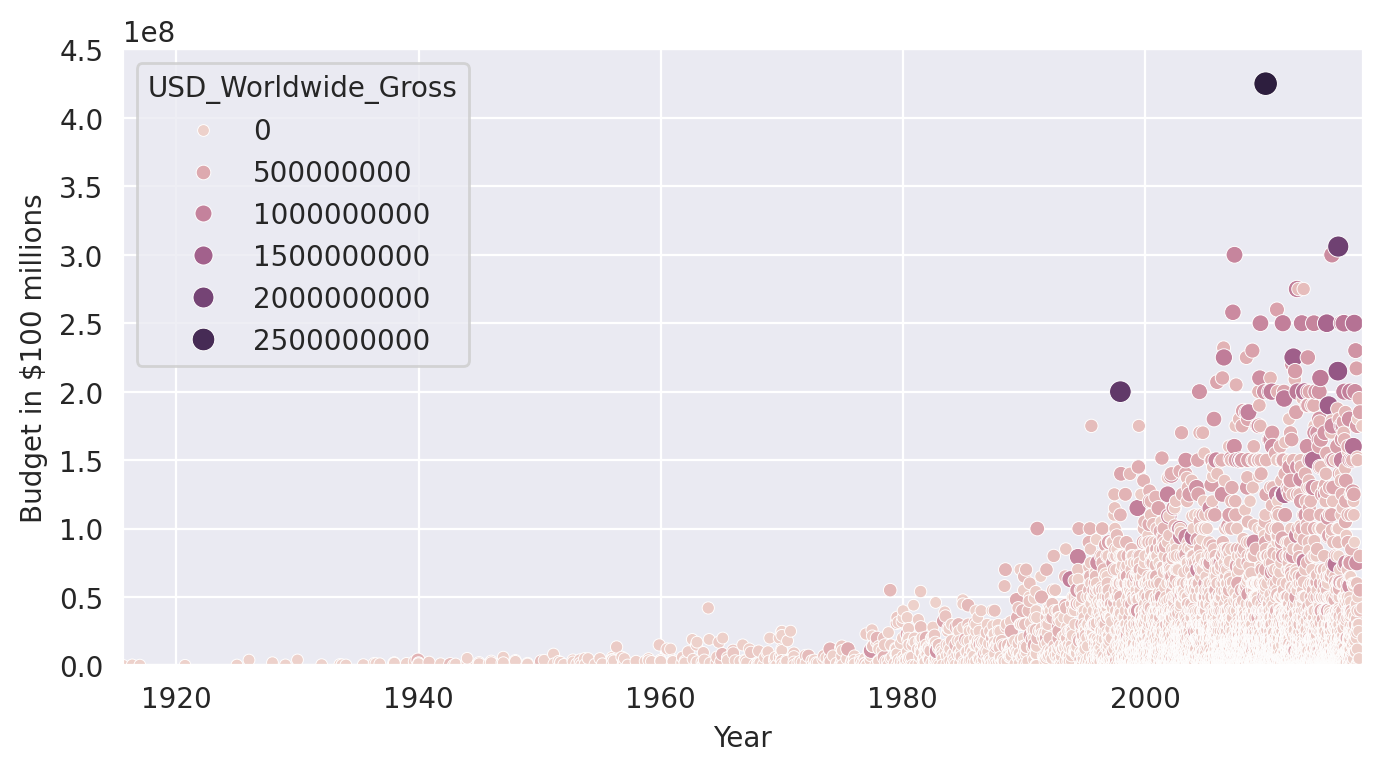

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean, x='Release_Date', y='USD_Production_Budget', size='USD_Worldwide_Gross', hue="USD_Worldwide_Gross")
ax.set(xlabel='Year', ylabel='Budget in $100 millions',
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()), ylim=(0, 450000000))

Calculating the decade in which each movie was released and adding it as a new column to the dataset.

In [ ]:
data_clean['Decades'] = data_clean.Release_Date.dt.year // 10 *10

In [ ]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films


In [ ]:
old_films = data_clean[data_clean.Decades < 1970]
new_films = data_clean[data_clean.Decades >= 1970]

In [ ]:
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [ ]:
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


# Seaborn Regression Plots

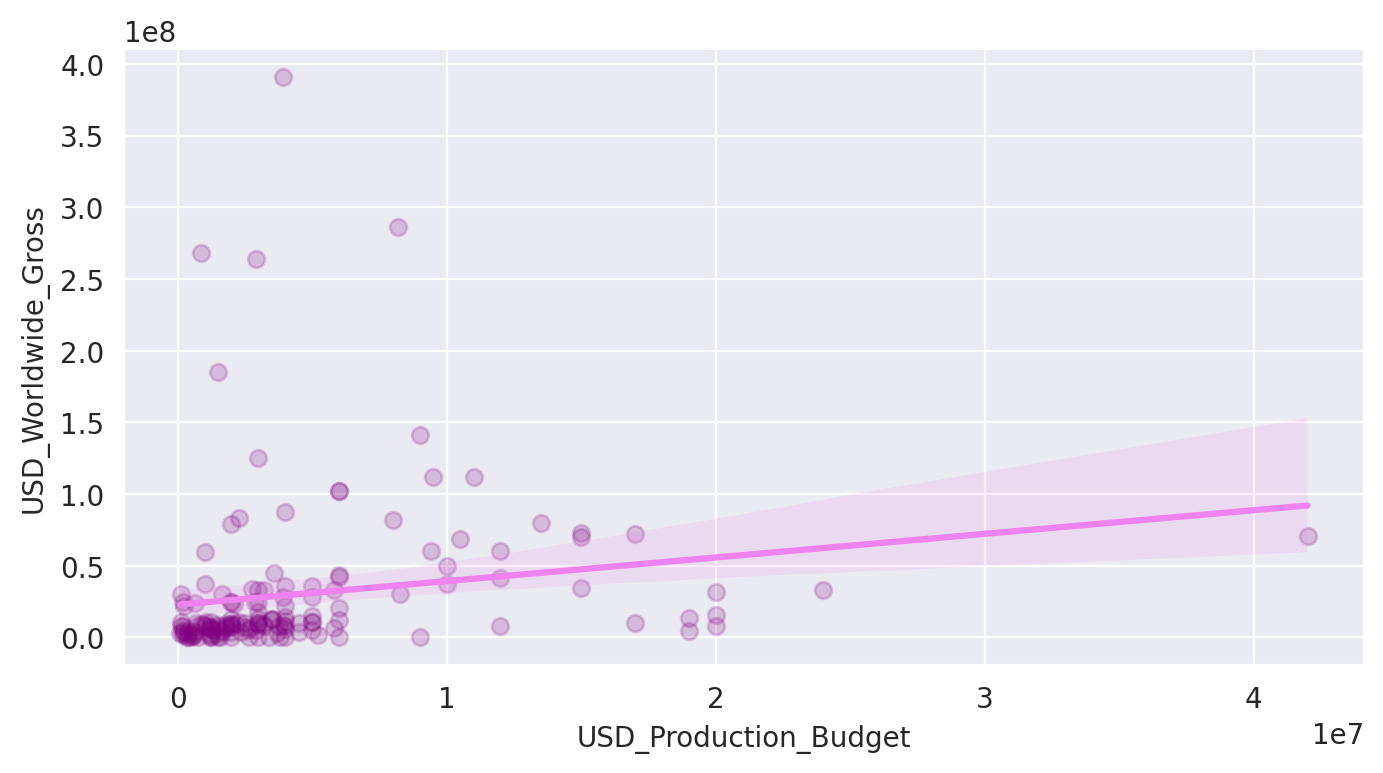

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  sns.regplot(data=old_films,
              x="USD_Production_Budget",
              y='USD_Worldwide_Gross',
              scatter_kws={'alpha':0.2, 'color':"purple"},
              line_kws={'color':'violet'})

Scatter plot and linear regression line against the `new_films`.


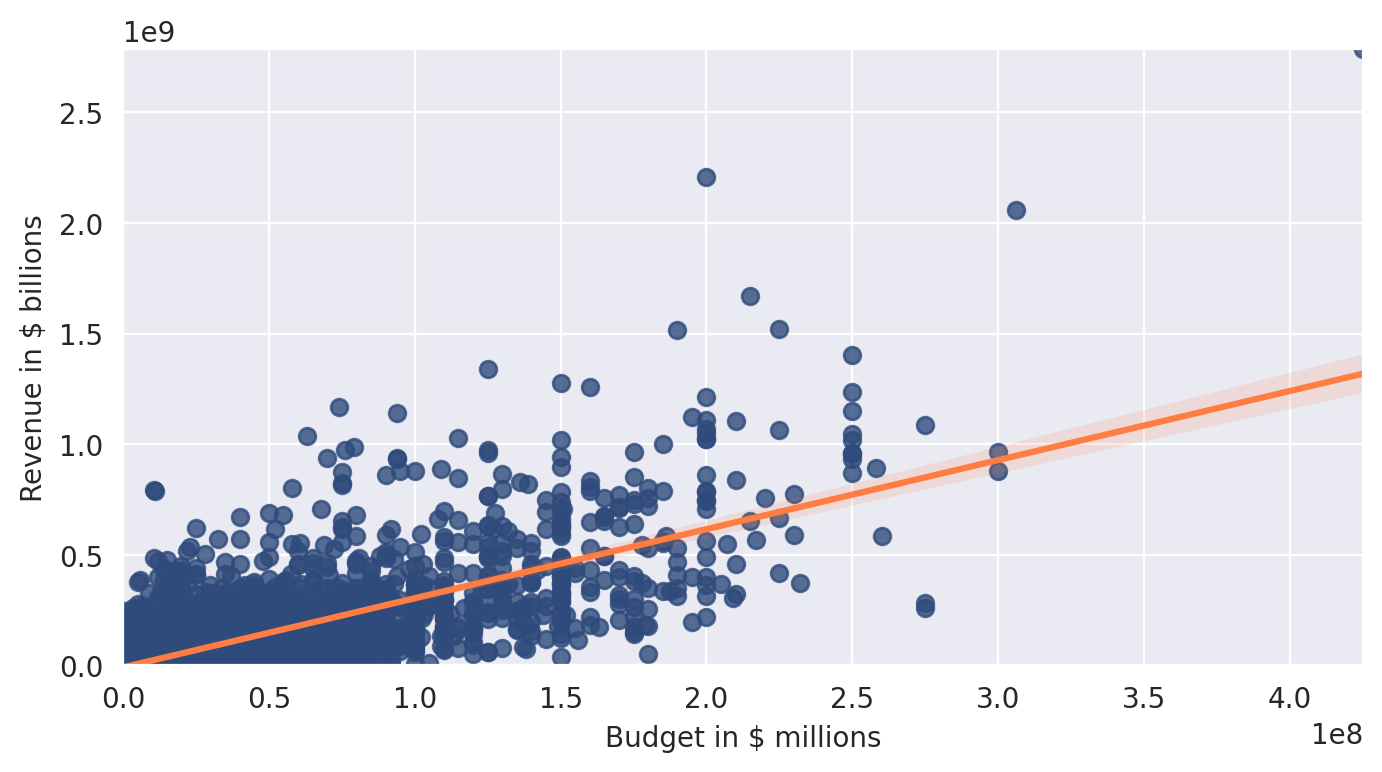

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
              x="USD_Production_Budget",
              y='USD_Worldwide_Gross',
              scatter_kws={'color':'#2f4b7c'},
              line_kws={'color':'#ff7c43'})
  ax.set(ylim=(0, new_films.USD_Worldwide_Gross.max()),
         xlim=(0, new_films.USD_Production_Budget.max()),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $ millions')

# Run Our Own Regression


In [ ]:
regression = LinearRegression()

In [ ]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y= pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [ ]:
regression.fit(X,y)

LinearRegression()

In [ ]:
regression.intercept_

array([-8650768.00661027])

In [ ]:
regression.coef_

array([[3.12259592]])

Run a linear regression for the `old_films`

In [ ]:
old_films_regression = LinearRegression()

In [ ]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y= pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [ ]:
old_films_regression.fit(X,y)

LinearRegression()

In [ ]:
old_films_regression.coef_

array([[1.64771314]])

In [ ]:
old_films_regression.intercept_

array([22821538.63508039])

In [ ]:
old_films_regression.score(X,y)

0.02937258620576877